In [37]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

from skimage.filters import threshold_yen
from skimage.exposure import rescale_intensity
from skimage.io import imread, imsave
import skimage.feature as feat

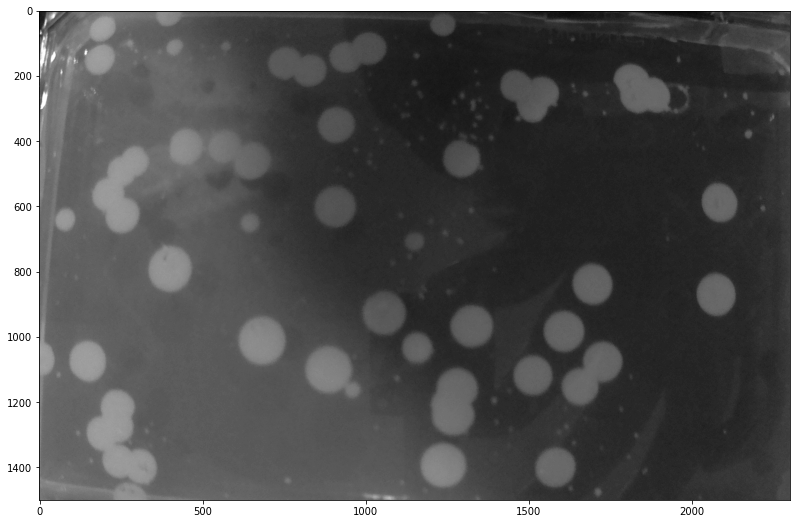

In [40]:
image = 'real.jpg'
img = cv2.imread(image, 1)
img_orig = img.copy()

crop = img[100:1600,150:2450]
gray = cv2.cvtColor(crop,cv2.COLOR_BGR2GRAY)

# blur = cv2.medianBlur(gray, 11)
blur = cv2.GaussianBlur(gray, (5, 5), 0)
invert = cv2.bitwise_not(blur)
# thresh = cv2.adaptiveThreshold(blur, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY_INV,21,2)

ret, thresh1 = cv2.threshold(blur, 127, 255, cv2.THRESH_BINARY_INV)
thresh2 = cv2.threshold(blur, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)[1]

# blobs2 = feat.blob_log(thresh1, max_sigma=30, num_sigma=10, threshold=0.1)

# Setup SimpleBlobDetector parameters.
params = cv2.SimpleBlobDetector_Params()

# Change thresholds
params.minThreshold = 10;
params.maxThreshold = 200;

# Filter by Area.
params.filterByArea = True
params.minArea = 1500

# Filter by Circularity
params.filterByCircularity = True
params.minCircularity = 0.1

# Filter by Convexity
params.filterByConvexity = True
params.minConvexity = 0.87

# Filter by Inertia
params.filterByInertia = True
params.minInertiaRatio = 0.01

# Create a detector with the parameters
detector = cv2.SimpleBlobDetector_create(params)

keypoints = detector.detect(thresh1)
blobs = cv2.drawKeypoints(crop, keypoints, np.array([]), (255,0,0), cv2.DRAW_MATCHES_FLAGS_DEFAULT)

plt.rcParams["figure.figsize"] = (16,9)
plt.imshow(gray, cmap='gray')

In [23]:

# print (all_circs_rounded)
# print (all_circs_rounded.shape)
# print ('there are' + str(all_circs_rounded.shape[1]) + 'circles')

In [24]:
all_circs1 = cv2.HoughCircles(thresh1, cv2.HOUGH_GRADIENT, 5, 120, param1=50, param2=130, minRadius=20, maxRadius=100)
all_circs_rounded1 = np.uint16(np.around(all_circs1))

# all_circs2 = cv2.HoughCircles(thresh2, cv2.HOUGH_GRADIENT, 5, 100, param1=50, param2=130, minRadius=20, maxRadius=100)
# all_circs_rounded2 = np.uint16(np.around(all_circs2))

In [25]:
count = 1
for i in all_circs_rounded1[0, :]:
    cv2.circle(crop, (i[0],i[1]), i[2], (36,255,12), 2)
    count += 1

count = 1
for i in all_circs_rounded2[0, :]:
    cv2.circle(crop, (i[0],i[1]), i[2], (36,255,12), 2)
    count += 1

NameError: name 'all_circs_rounded2' is not defined

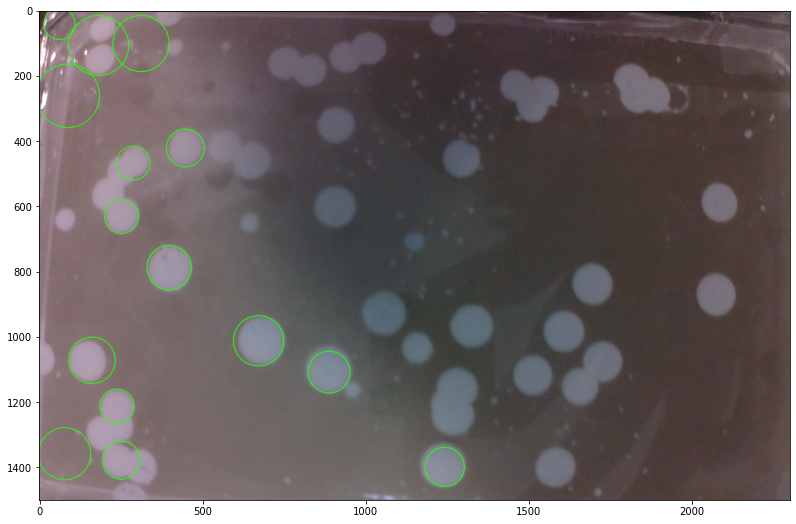

In [251]:
plt.rcParams["figure.figsize"] = (16,9)
plt.imshow(crop)